<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SVM **

In [1]:
import numpy as np
import pandas as pd
TrainPd=pd.read_excel("Concrete_Data.xls")
#renaming all featurses
TrainPd.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

#Verification des valeur manquantes
TrainPd.isna().sum()

# Split the data into features and target
X=TrainPd.drop(["strength"],axis=1)
Y=TrainPd["strength"]
Names=list(X.columns.values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 1)

#Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit on training set only.
scaler.fit(X_train)
MinMaxScaler(copy=(), feature_range=(0,1))
# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train)
X_test_transoformed = scaler.transform(X_test)

In [2]:
from sklearn.svm import SVR

# Définition du modèle SVM avec noyau linéaire
svm_regressor = SVR(kernel='linear')

# Entraînement du modèle sur les données d'entraînement normalisées
svm_regressor.fit(X_train_transformed, Y_train)


SVR(kernel='linear')

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Définition des hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

# Initialisation de la recherche par grille
grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Exécution de la recherche par grille sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Affichage des meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)

# Utilisation du modèle avec les meilleurs paramètres sur les données de test
best_svm = grid_search.best_estimator_
predictions = best_svm.predict(X_test_transoformed)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(Y_test, predictions)
print("Mean Absolute Error (MAE) :", mae)

# Calcul de l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(Y_test, predictions)
print("Mean Squared Error (MSE) :", mse)

# Calcul de la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) :", rmse)

# Calcul du coefficient de détermination R²
r2 = r2_score(Y_test, predictions)
print("R-squared (R²) :", r2)


Meilleurs hyperparamètres trouvés :  {'C': 100, 'epsilon': 0.1, 'gamma': 10, 'kernel': 'rbf'}
Mean Absolute Error (MAE) : 4.46104008093728
Mean Squared Error (MSE) : 50.624545846321716
Root Mean Squared Error (RMSE) : 7.115092820639918
R-squared (R²) : 0.8058102426826924


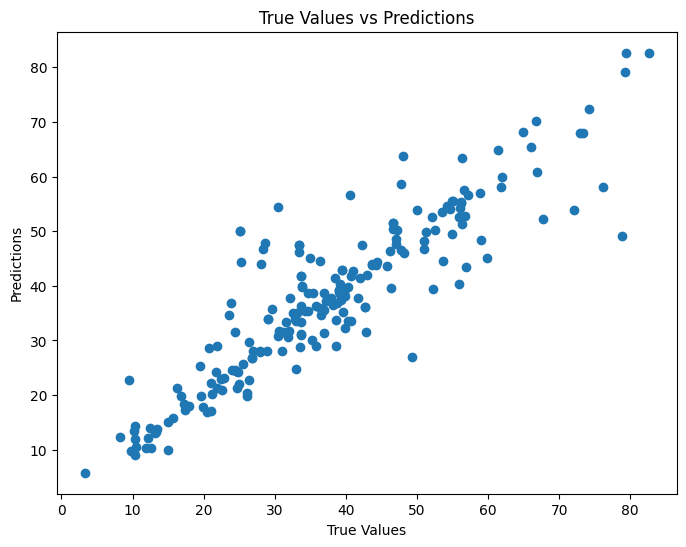

In [5]:
import matplotlib.pyplot as plt
# Visualisation des prédictions par rapport aux valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# **XGBoost**

In [6]:

import xgboost as xgb


# Réglage des hyperparamètres pour XGBoost
xgb_regressor = xgb.XGBRegressor()

# Paramètres à régler
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Recherche par grille pour trouver les meilleurs hyperparamètres
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5)
grid_search.fit(X_train_transformed, Y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres trouvés :", best_params)

# Utilisation du modèle avec les meilleurs hyperparamètres
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train_transformed, Y_train)
predictions = best_xgb.predict(X_test_transoformed)

# Évaluation du modèle
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print("Mean Absolute Error (MAE) :", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R-squared (R²) :", r2)


Meilleurs hyperparamètres trouvés : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Mean Absolute Error (MAE) : 3.286273375987067
Mean Squared Error (MSE) : 22.316317603715795
Root Mean Squared Error (RMSE) : 4.724014987668413
R-squared (R²) : 0.9143972508348654
